In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.stats import linregress
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
df = pd.read_excel("6_Forecasting_Data.xlsm", sheet_name="Timeseries")
data = df.to_numpy()
series = pd.Series(data[:, 1], data[:, 0])

In [3]:
# 1.1
SES = SimpleExpSmoothing(series).fit()

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [4]:
# 1.2, 1.5
SES.forecast(12)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


36    289.958165
37    289.958165
38    289.958165
39    289.958165
40    289.958165
41    289.958165
42    289.958165
43    289.958165
44    289.958165
45    289.958165
46    289.958165
47    289.958165
dtype: float64

In [5]:
# 1.3
SES.sse

14551.848333915868

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


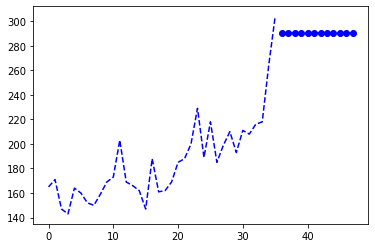

In [6]:
#  1.4
df.Demand.plot(style="--", color="blue")
SES.forecast(12).plot(style="--", marker="o", color="blue")

In [7]:
# 2.0
linregress(x=data[:, 0], y=data[:, 1])

LinregressResult(slope=2.5386100386100385, intercept=139.06349206349205, rvalue=0.7879800756316014, pvalue=1.1694156537818794e-08, stderr=0.34018172051263185)

In [8]:
# 2.2
lin = linregress(x=data[:18, 0], y=data[:18, 1])
print(lin.intercept, lin.slope)

155.8823529411765 0.8369453044375644


In [9]:
# 2.3, 2.4
holt = Holt(series).fit()

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [10]:
# 2.1
holt.params

{'smoothing_level': 0.6608133734013051,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 158.99582311081133,
 'initial_slope': 3.549304255811156,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [11]:
# 2.5
holt.resid

1      2.454873
2      3.283356
3    -26.435634
4    -16.515918
5     11.848717
6     -3.530378
7    -12.746761
8     -9.872835
9      2.101962
10     7.163653
11     2.880511
12    27.427727
13   -28.246186
14   -16.130033
15   -13.020396
16   -22.965648
17    29.661055
18   -20.488671
19    -9.498787
20     0.228834
21    12.528313
22     3.700132
23     9.705731
24    28.742750
25   -33.800148
26    13.986138
27   -31.805393
28    -0.337268
29     7.336299
30   -18.060930
31     8.324670
32    -3.725688
33     3.186992
34    -0.468319
35    42.291848
36    50.795525
dtype: float64

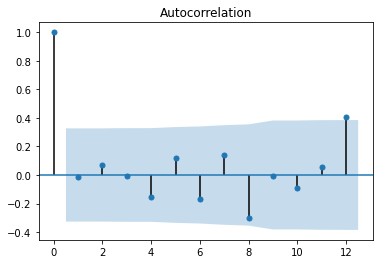

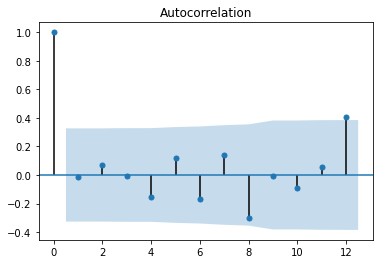

In [12]:
# 2.6
plot_acf(holt.resid, lags=12)

In [13]:
# 2.7
acf(holt.resid, nlags=12)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.        , -0.01736194,  0.0675371 , -0.00440477, -0.15176776,
        0.11991835, -0.16848875,  0.13962322, -0.30455654, -0.00583059,
       -0.0923196 ,  0.05242077,  0.40895052])

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


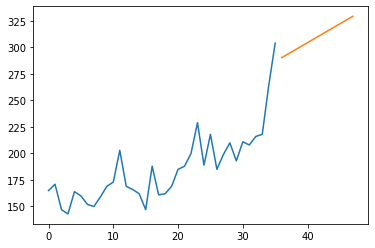

In [14]:
# 2.8
df.Demand.plot()
holt.forecast(12).plot()

In [15]:
holt.forecast(12)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


36    290.320141
37    293.869446
38    297.418750
39    300.968054
40    304.517358
41    308.066663
42    311.615967
43    315.165271
44    318.714576
45    322.263880
46    325.813184
47    329.362488
dtype: float64

In [16]:
# 3.1
smoothed = [np.nan for _ in range(36)]
for i in range(6, 30):
    smoothed[i] = (np.mean(data[:, 1][i:i + 12]) + np.mean(data[:, 1][i+1:i + 13])) / 2
smoothed

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 167.0,
 168.20833333333331,
 170.08333333333331,
 171.95833333333331,
 173.875,
 176.08333333333331,
 178.0,
 181.0,
 184.125,
 187.25,
 190.33333333333331,
 192.58333333333331,
 195.95833333333331,
 199.625,
 202.54166666666669,
 205.08333333333334,
 209.0,
 214.79166666666666,
 219.2310606060606,
 220.6727272727273,
 222.7888888888889,
 226.38888888888889,
 229.28571428571428,
 233.70238095238096,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [17]:
# 3.2, 3.5
season = ExponentialSmoothing(series, trend="add", seasonal="mul", seasonal_periods=12).fit()
initialSeasonalFactors = np.vstack((season.params["initial_seasons"].reshape(-1, 1), season.params["initial_seasons"].reshape(-1, 1), season.params["initial_seasons"].reshape(-1, 1)))
initialSeasonalFactors

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


array([[0.92845417],
       [0.98109897],
       [0.85713328],
       [0.8442969 ],
       [0.95202043],
       [0.86033065],
       [0.87351924],
       [0.86208068],
       [0.90245507],
       [0.91330553],
       [1.01135212],
       [1.15304801],
       [0.92845417],
       [0.98109897],
       [0.85713328],
       [0.8442969 ],
       [0.95202043],
       [0.86033065],
       [0.87351924],
       [0.86208068],
       [0.90245507],
       [0.91330553],
       [1.01135212],
       [1.15304801],
       [0.92845417],
       [0.98109897],
       [0.85713328],
       [0.8442969 ],
       [0.95202043],
       [0.86033065],
       [0.87351924],
       [0.86208068],
       [0.90245507],
       [0.91330553],
       [1.01135212],
       [1.15304801]])

In [18]:
# 3.3
deseazonalizedData = [0 for _ in range(36)]
for i,v in enumerate(deseazonalizedData):
    deseazonalizedData[i] = data[:, 1][i] / initialSeasonalFactors[i][0]
deseazonalizedData

[177.71474862101016,
 174.29434281860372,
 171.50191562306824,
 169.37169922024742,
 172.2652112213207,
 185.97500943491713,
 174.00875967593285,
 173.99763564380189,
 176.1860557374385,
 185.04212865408812,
 171.05812693319317,
 176.05511442158056,
 182.02298495121647,
 169.19801700519426,
 189.00211109480992,
 174.1093691285061,
 197.47475432687983,
 187.13735324388537,
 185.45670439145476,
 196.03733615868347,
 204.99635415991273,
 205.84568157969565,
 197.75506003837359,
 198.60404533271895,
 203.564166602248,
 222.19980546465268,
 215.83574415148047,
 235.6990779358688,
 220.58350217364236,
 224.3323551308688,
 241.55163349751206,
 241.27672142607196,
 239.3470945867089,
 238.69339672539175,
 261.03667925065315,
 263.6490383456182]

In [19]:
# 3.4
holtWintersSeasonal = [[np.nan for _ in range(2)] for _ in range(48)]
holtWintersSeasonal[11] = [season.params["initial_level"], season.params["initial_slope"]]
for i in range(12, 48):
    holtWintersSeasonal[i][0] = season.params["smoothing_level"] * data[i - 12, 1] / season.params["initial_seasons"][i % 12] + (1 - season.params["smoothing_level"]) * (sum(holtWintersSeasonal[i - 1]))
    holtWintersSeasonal[i][1] = season.params["smoothing_slope"] * (holtWintersSeasonal[i][0] - holtWintersSeasonal[i - 1][0]) + (1 - season.params["smoothing_slope"]) * holtWintersSeasonal[i - 1][1]
for i in range(37, 49):
    print((holtWintersSeasonal[47][0] + (i - 36) * holtWintersSeasonal[47][1]) * season.params["initial_seasons"][i - 37])

243.36902994262522
261.9250983819783
232.98548209333168
233.5897106998581
268.00902042968244
246.36802072546814
254.37985136708946
255.22842622990956
271.5570843329767
279.2500706978038
314.13189939541064
363.73380072846703


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


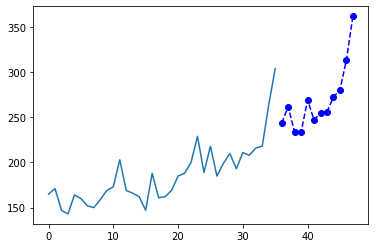

In [20]:
# 3.6
df.Demand.plot()
season.forecast(12).plot(style="--", marker="o", color="blue")

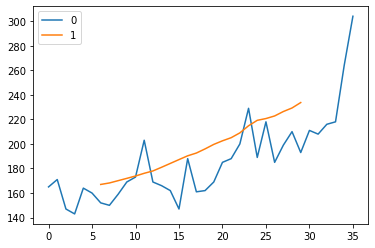

In [21]:
graphData = np.hstack((data[:, 1].reshape(-1, 1), np.array(smoothed).reshape(-1, 1)))
pd.DataFrame(graphData).plot()

In [22]:
season.forecast(12)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


36    243.653544
37    261.894278
38    233.728698
39    233.769819
40    269.091744
41    247.207091
42    254.738356
43    256.025261
44    272.616274
45    280.410811
46    313.900717
47    362.089388
dtype: float64